## Importing Basic Libraries

In [1]:
# for data visualization  & data analysis
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [3]:
# setting up the chart size and background
plt.rcParams['figure.figsize'] = (16, 8)
plt.style.use('fivethirtyeight')

In [4]:
# for Interactive Shells
from IPython.display import display

In [5]:
# for jupyter notebook widgets
import ipywidgets as widgets
from ipywidgets import interact
from ipywidgets import interact_manual


## Lets read the Dataset

In [7]:
# Lets read the data sets
data=pd.read_csv(r'C:\Users\Jayanta Roy\Machine Learning Projects/movie_metadata.csv')
data.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [8]:
# Lets check the shape 
data.shape

(5043, 28)

In [9]:
# Lets check the column wise info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [10]:
# Lets remove unnecessary columns from the datasets 
data=data.drop(['color',
                       'director_facebook_likes',
                       'actor_1_facebook_likes',
                       'cast_total_facebook_likes',
                       'actor_2_facebook_likes',
                      'facenumber_in_poster',
                      'content_rating',
                      'movie_imdb_link',
                      'aspect_ratio',
                      'plot_keywords',
                
                       ],
                           axis=1)
data.columns

Index(['director_name', 'num_critic_for_reviews', 'duration',
       'actor_3_facebook_likes', 'actor_2_name', 'gross', 'genres',
       'actor_1_name', 'movie_title', 'num_voted_users', 'actor_3_name',
       'num_user_for_reviews', 'language', 'country', 'budget', 'title_year',
       'imdb_score', 'movie_facebook_likes'],
      dtype='object')

## Missing Values Imputation

In [11]:
# Missing Values Imputation
# lets check the rows having high percentage of missing values in the dataset 
round(100*(data.isnull().sum()/len(data.index)),2)

director_name              2.06
num_critic_for_reviews     0.99
duration                   0.30
actor_3_facebook_likes     0.46
actor_2_name               0.26
gross                     17.53
genres                     0.00
actor_1_name               0.14
movie_title                0.00
num_voted_users            0.00
actor_3_name               0.46
num_user_for_reviews       0.42
language                   0.24
country                    0.10
budget                     9.76
title_year                 2.14
imdb_score                 0.00
movie_facebook_likes       0.00
dtype: float64

In [12]:
# Since gross and budget columns have large number of 
data=data[~np.isnan(data['gross'])]
data=data[~np.isnan(data['budget'])]

In [12]:
#Now lets again check the Missing Values column wise 
data.isnull().sum()

director_name              0
num_critic_for_reviews     1
duration                   1
actor_3_facebook_likes    10
actor_2_name               5
gross                      0
genres                     0
actor_1_name               3
movie_title                0
num_voted_users            0
actor_3_name              10
num_user_for_reviews       0
language                   3
country                    0
budget                     0
title_year                 0
imdb_score                 0
movie_facebook_likes       0
dtype: int64

In [13]:
# The rows for which the sum of Null 
data=data[data.isnull().sum(axis=1)<=2]
data.isnull().sum()

director_name             0
num_critic_for_reviews    1
duration                  1
actor_3_facebook_likes    5
actor_2_name              0
gross                     0
genres                    0
actor_1_name              0
movie_title               0
num_voted_users           0
actor_3_name              5
num_user_for_reviews      0
language                  3
country                   0
budget                    0
title_year                0
imdb_score                0
movie_facebook_likes      0
dtype: int64

In [13]:
# Lets impute the missing values 
# using mean for numerical columns
data['num_critic_for_reviews'].fillna(data['num_critic_for_reviews'].mean(), inplace=True)
data['duration'].fillna(data['duration'].mean(),inplace=True)

# using mode for categorical columns
data['language'].fillna(data['language'].mode()[0],inplace=True)

#As we know that we cannot use statistical values for imputing the missing values of actor names, so we will the replace the 
# actor name with unkown actor 
data['actor_2_name'].fillna('Unknown Actor',inplace=True)
data['actor_3_name'].fillna('Unknown Actor', inplace =True)

# As we imputed all the missing values lets check the no. of total missing values of dataset
data.isnull().sum().sum()


13

## Feature Engineering

In [14]:
# Top 10 Profitable movies 
# Lets convert the gross and budget from $ to million dollar to make our analysis easier 
data['gross']=data['gross']/1000000
data['budget']=data['budget']/1000000

In [15]:
# Lets create the profit columns for budget and gross
data['Profit']=data['gross']-data['budget']

In [16]:
#Lets also check the name of Top 10 Profitable Movies 
data[['Profit','movie_title']].sort_values(by ='Profit', ascending =False ).head(10)

,Profit,movie_title
0,523.505847,Avatar
29,502.177271,Jurassic World
26,458.672302,Titanic
3024,449.935665,Star Wars: Episode IV - A New Hope
3080,424.449459,E.T. the Extra-Terrestrial
794,403.279547,The Avengers
17,403.279547,The Avengers
509,377.783777,The Lion King
240,359.544677,Star Wars: Episode I - The Phantom Menace
66,348.316061,The Dark Knight


In [17]:
# By looking at the above result we can easily analyze that there are some duplicates
# Lets print the no. of rows before removing duplicates 
print('No. of Rows Before Removing Duplicates:', data.shape[0])

# Lets remove all the duplicates from the data
data.drop_duplicates(subset= None, keep='first',inplace =True)
      
# Lets print the no. of rows after removing duplicates 
print('No. of Rows Before Removing Duplicates:', data.shape[0])

No. of Rows Before Removing Duplicates: 3891
No. of Rows Before Removing Duplicates: 3856


In [18]:
# Lets check the Top 10 Profitable Movies again
data[['movie_title','Profit']].sort_values(by ='Profit', ascending =False ).head(10)

,movie_title,Profit
0,Avatar,523.505847
29,Jurassic World,502.177271
26,Titanic,458.672302
3024,Star Wars: Episode IV - A New Hope,449.935665
3080,E.T. the Extra-Terrestrial,424.449459
17,The Avengers,403.279547
509,The Lion King,377.783777
240,Star Wars: Episode I - The Phantom Menace,359.544677
66,The Dark Knight,348.316061
439,The Hunger Games,329.999255


In [19]:
# Lets check the values in the language column
data['language'].value_counts()

English       3676
French          37
Spanish         26
Mandarin        14
German          13
Japanese        12
Hindi           10
Cantonese        8
Italian          7
Portuguese       5
Korean           5
Norwegian        4
Dutch            3
Persian          3
Thai             3
Hebrew           3
Danish           3
Aboriginal       2
Dari             2
Indonesian       2
Russian          1
Romanian         1
Vietnamese       1
Arabic           1
Dzongkha         1
Zulu             1
None             1
Aramaic          1
Czech            1
Telugu           1
Icelandic        1
Filipino         1
Hungarian        1
Maya             1
Bosnian          1
Mongolian        1
Kazakh           1
Swedish          1
Name: language, dtype: int64

In [20]:
# Looking at the above output we can easily observe that of 3500 movies only 150 movies of other language
#so it is better to keep only two languages that is english and foreign
def language(x):
    if x=='English':
        return  'English'
    else:
         return 'Foreign'
        
# Lets apply the function on the language column 
data['language']=data['language'].apply(language)

# Lets check the values again 
data['language'].value_counts()

English    3676
Foreign     180
Name: language, dtype: int64

In [21]:
data['duration'].value_counts()

101.0    113
100.0    109
98.0     105
95.0      97
99.0      97
        ... 
196.0      1
63.0       1
185.0      1
219.0      1
65.0       1
Name: duration, Length: 157, dtype: int64

In [22]:
# The Duration of Movies is not verying a lot but we know most of the users either like watching long movies or short
# duration movies we can categores the movies in two part i.e short and long

#Lets define a function for categorizing duration of movies 
def duration (x):
    if x<= 120: 
        return 'Short'
    else:
        return 'Long'
    
#Lets apply this function on the duration column 
data['duration']=data['duration'].apply(duration)

# Lets check the values of of Duration columns 
data['duration'].value_counts()


Short    2939
Long      917
Name: duration, dtype: int64

In [23]:
#Lets also check the values in the Genres columns
data['genres'].value_counts()

Drama                                     153
Comedy|Drama|Romance                      151
Comedy|Drama                              147
Comedy                                    145
Comedy|Romance                            135
                                         ... 
Action|Crime|Drama|Thriller|War             1
Adventure|Comedy|Family|Musical             1
Action|Adventure|Family|Fantasy|Sci-Fi      1
Action|Drama|Mystery|Thriller|War           1
Comedy|Crime|Horror                         1
Name: genres, Length: 762, dtype: int64

In [24]:
data['genres'].str.split('|')[0]

['Action', 'Adventure', 'Fantasy', 'Sci-Fi']

In [25]:
# We can see from the above output that most of the movies are having a lot of genres
# also, a movie can have so many genres so lets keep four genres

data['Moviegenres']=data['genres'].str.split('|')
data['Genre1']=data['Moviegenres'].apply(lambda x: x[0])

# some of the movies have only one genre in such cases, assign same genre to genre2 as well
data['Genre2']=data['Moviegenres'].apply(lambda x: x[1] if len (x) > 1 else x[0])
data['Genre3']=data['Moviegenres'].apply(lambda x: x[1] if len (x) > 2 else x[0])
data['Genre4']=data['Moviegenres'].apply(lambda x: x[1] if len (x) > 3 else x[0])

# Lets check the head of the data
data[['genres','Genre1','Genre2','Genre3']].head(5)



,genres,Genre1,Genre2,Genre3
0,Action|Adventure|Fantasy|Sci-Fi,Action,Adventure,Adventure
1,Action|Adventure|Fantasy,Action,Adventure,Adventure
2,Action|Adventure|Thriller,Action,Adventure,Adventure
3,Action|Thriller,Action,Thriller,Action
5,Action|Adventure|Sci-Fi,Action,Adventure,Adventure


## Data Visualization

In [26]:
# Lets also calculate the Social Media popularity of a Movie
# To calculate a popularity of a movie, we can aggregate No. of voted users , No. of Users for Reviews and Facebook likes
data['Social_Media_Popularity']=((data['num_user_for_reviews']/data['num_voted_users'])*data['movie_facebook_likes'])/1000000



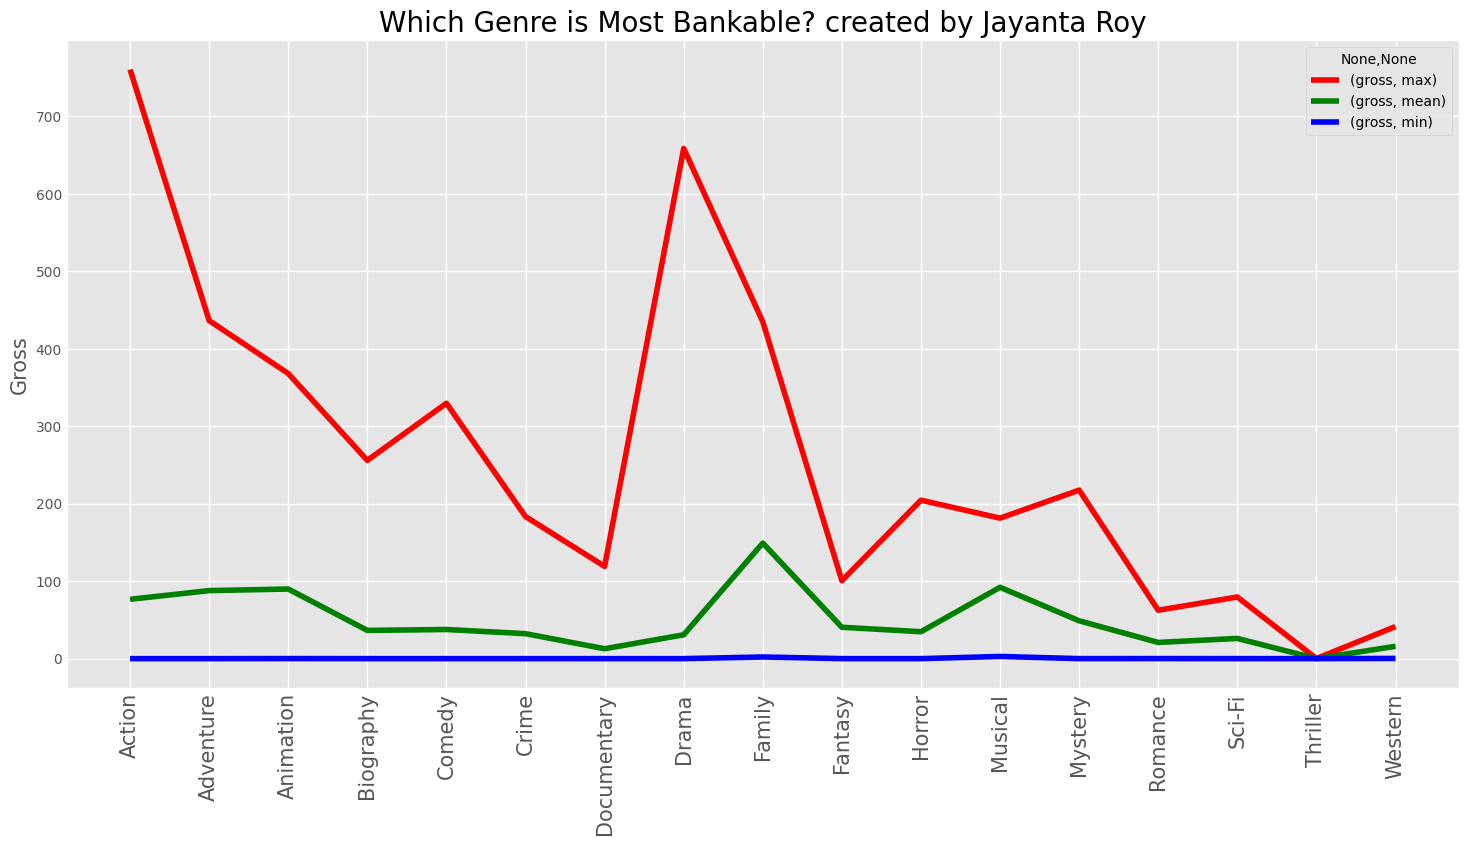

The Most Profitable Movie from each Genre created by Jayanta Roy


,Genre1,movie_title,gross
0,Action,Avatar,760.505847
509,Adventure,The Lion King,422.783777
521,Animation,Despicable Me 2,368.049635
1403,Biography,The Blind Side,255.950375
836,Comedy,Forrest Gump,329.691196
3466,Crime,The Godfather,134.821952
3583,Documentary,Fahrenheit 9/11,119.078393
26,Drama,Titanic,658.672302
3080,Family,E.T. the Extra-Terrestrial,434.949459
2485,Fantasy,The Others,96.471845


In [60]:
# Lets compare the Gross with Genres

# first group the genres and get max, min, and avg gross of the movies of that genre.)
display(data[['Genre1','gross',]].groupby(['Genre1']).agg(['max','mean','min']).style.background_gradient(cmap = 'Wistia'))

# lets plot these values using lineplot
data[['Genre1','gross',]].groupby(['Genre1']).agg(['max','mean','min']).plot(kind = 'line', color = ['red','green','blue'])
plt.title('Which Genre is Most Bankable? created by Jayanta Roy', fontsize = 20)
plt.xticks(np.arange(17), ['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'Horror', 'Musical',
       'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'Western'], rotation = 90, fontsize = 15)
plt.ylabel('Gross', fontsize = 15)
plt.xlabel(' ',)
plt.show()

print('The Most Profitable Movie from each Genre created by Jayanta Roy')
display(data.loc[data.groupby(data['Genre1'])['Profit'].idxmax()][['Genre1',
                                    'movie_title','gross']].style.background_gradient(cmap = 'copper'))

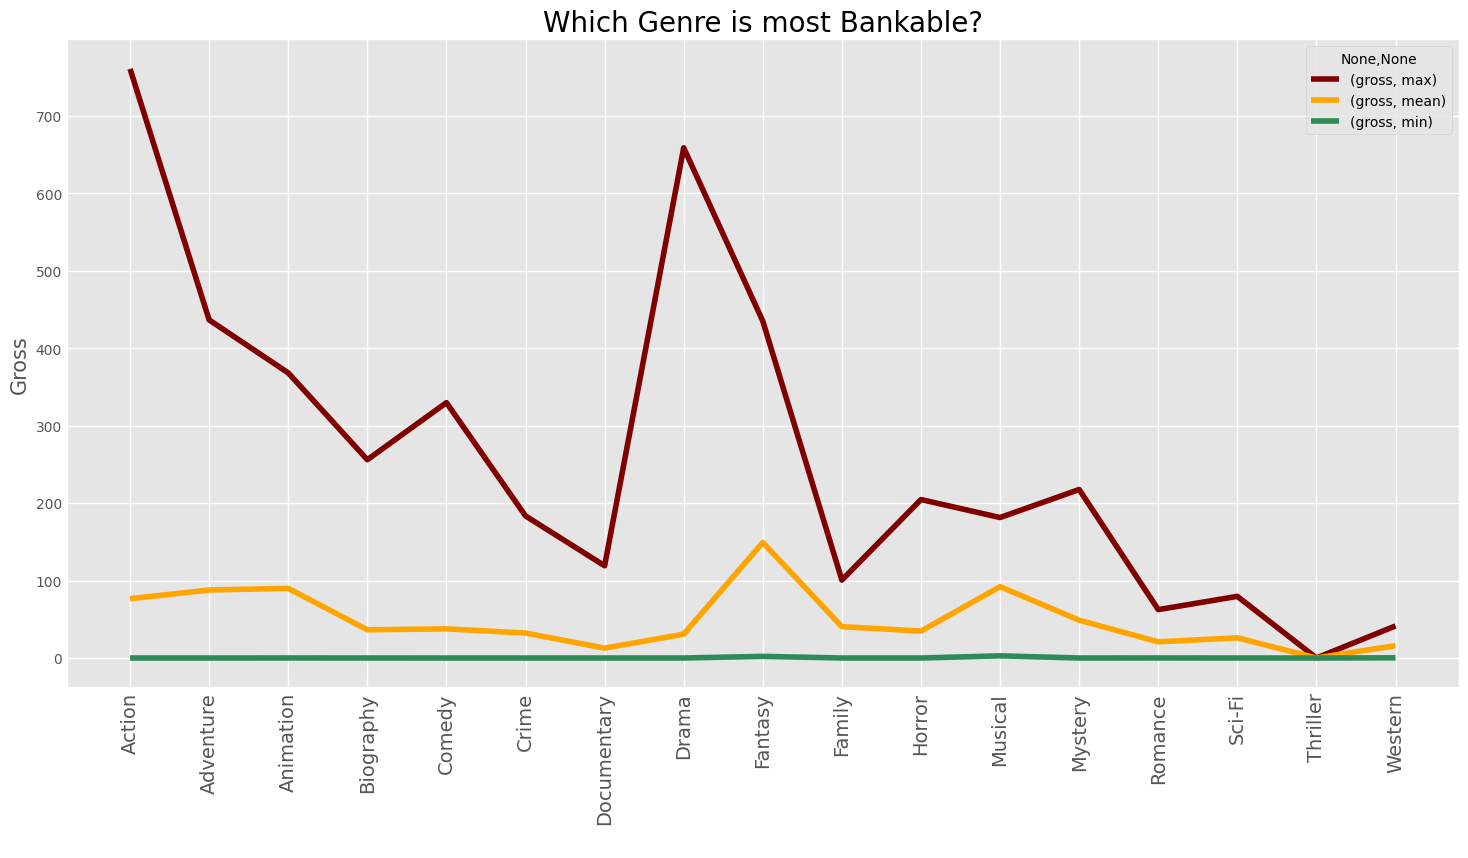

In [78]:
# Lets compare the Gross with Genres
#first the group the genres and get max,min and avg gross of the movies of the genre
display(data[['Genre1','gross',]].groupby(['Genre1']).agg(['max','mean','min']).style.background_gradient(cmap='Wistia'))
#Lets plot these values using lineplot
data[['Genre1','gross',]].groupby(['Genre1']).agg(['max','mean','min']).plot(kind='line',color=['maroon','orange','seagreen'])
plt.title('Which Genre is most Bankable?', fontsize=20)
plt.xticks(np.arange(17),['Action','Adventure','Animation','Biography','Comedy','Crime',
                          'Documentary','Drama','Fantasy','Family','Horror','Musical',
                           'Mystery','Romance','Sci-Fi','Thriller','Western'], rotation=90, fontsize=14)

plt.ylabel('Gross', fontsize=15)
plt.xlabel(' ',)
plt.show()





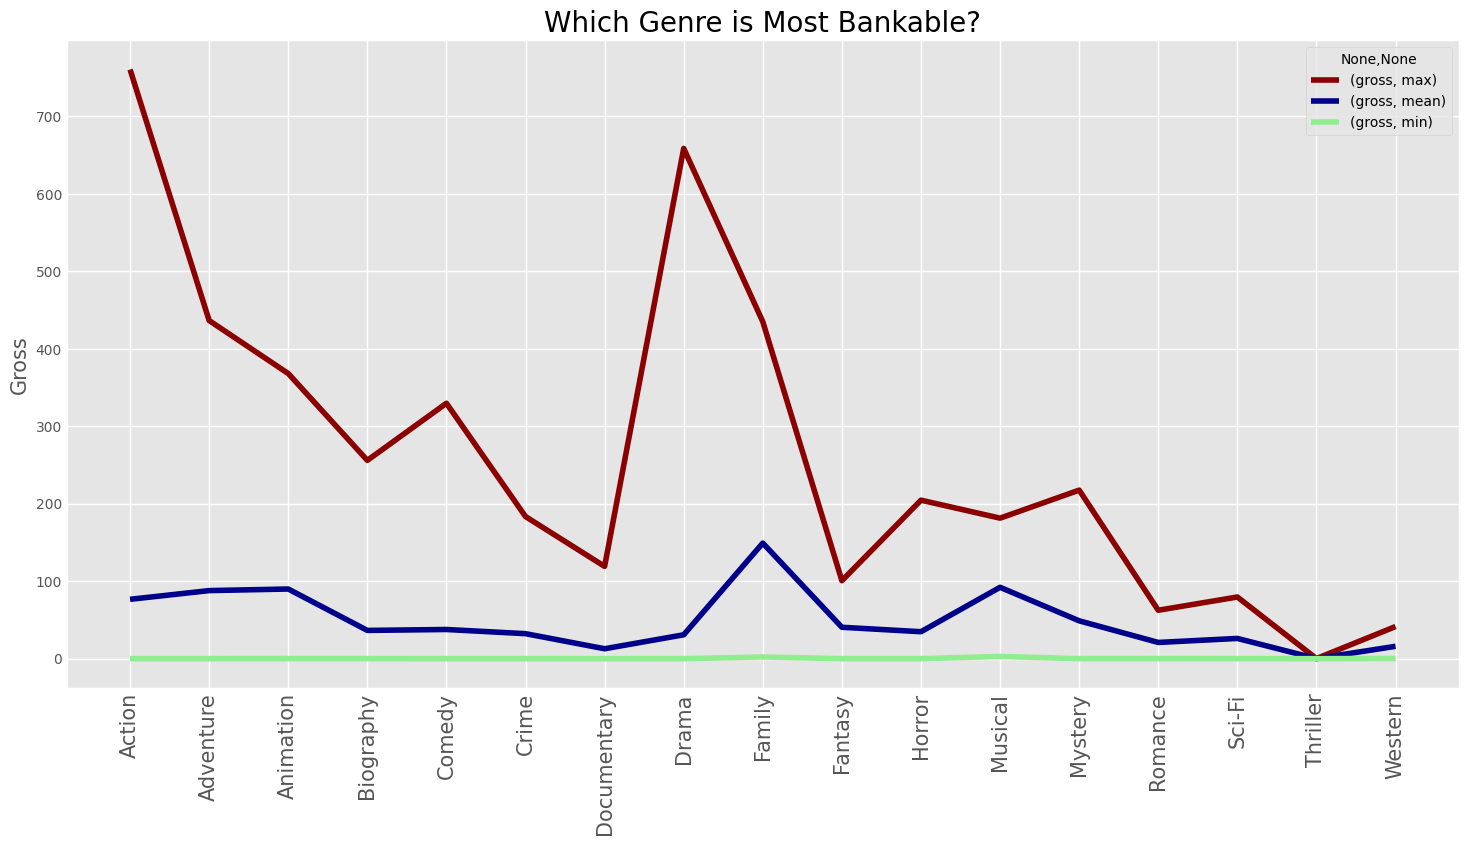

In [79]:
# Lets compare the Gross with Genres

# first group the genres and get max, min, and avg gross of the movies of that genre.)
display(data[['Genre1','gross',]].groupby(['Genre1']).agg(['max','mean','min']).style.background_gradient(cmap = 'copper'))

# lets plot these values using lineplot
data[['Genre1','gross',]].groupby(['Genre1']).agg(['max','mean','min']).plot(kind = 'line', color = ['darkred','darkblue','lightgreen'])
plt.title('Which Genre is Most Bankable?', fontsize = 20)
plt.xticks(np.arange(17), ['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'Horror', 'Musical',
       'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'Western'], rotation = 90, fontsize = 15)
plt.ylabel('Gross', fontsize = 15)
plt.xlabel(' ',)
plt.show()

In [29]:
print('The Most Profitable Movie from each Genre created by Jayanta Roy')
display(data.loc[data.groupby(data['Genre1'])['Profit'].idxmax()][['Genre1',
                                   'movie_title','gross']].style.background_gradient(cmap='Greens'))                                      

The Most Profitable Movie from each Genre created by Jayanta Roy


,Genre1,movie_title,gross
0,Action,Avatar,760.505847
509,Adventure,The Lion King,422.783777
521,Animation,Despicable Me 2,368.049635
1403,Biography,The Blind Side,255.950375
836,Comedy,Forrest Gump,329.691196
3466,Crime,The Godfather,134.821952
3583,Documentary,Fahrenheit 9/11,119.078393
26,Drama,Titanic,658.672302
3080,Family,E.T. the Extra-Terrestrial,434.949459
2485,Fantasy,The Others,96.471845


In [30]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [31]:
#Lets convert year into interger
data['title_year']=data['title_year'].astype('int')

In [32]:
print('The Most Profitable Years of the Box Office created by Jayanta Roy')
display(data[['title_year','language','Profit']].groupby(['language','title_year']).agg(sum).sort_values(by='Profit',ascending=False).head(10).style.background_gradient(cmap='Reds'))

The Most Profitable Years of the Box Office created by Jayanta Roy


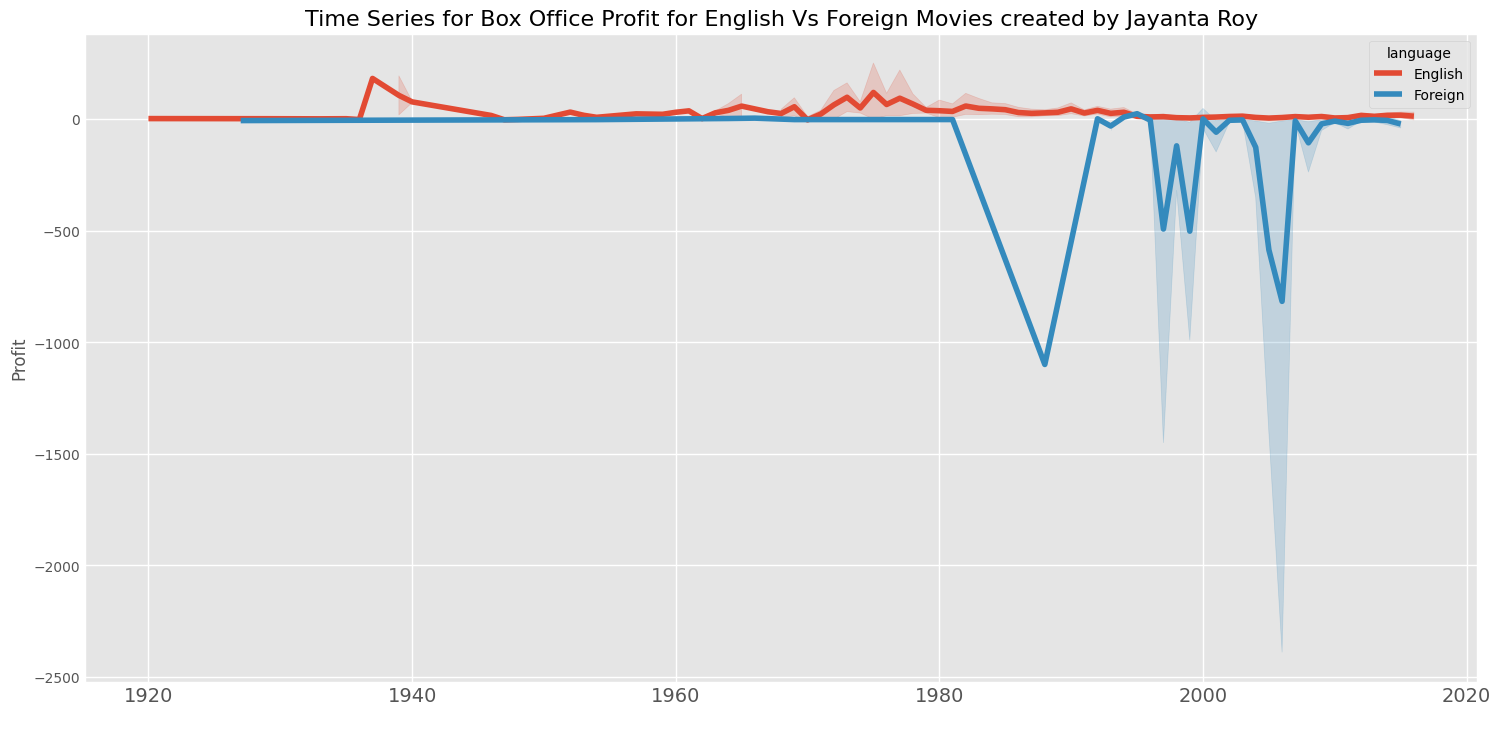

In [33]:
#Lets Plot the Profit
#plt.rcParams['figure,figsize']=(16,5))
plt.style.use('ggplot')
sns.lineplot(data=data, x='title_year',y='Profit',hue=data['language'])
plt.title('Time Series for Box Office Profit for English Vs Foreign Movies created by Jayanta Roy',fontsize= 16)
plt.xticks(fontsize= 14)
plt.xlabel(' ')
plt.show()

In [34]:
print('Movies that made huge Losses created by Jayanta Roy')
display(data[data['Profit']< -2000][['movie_title','language','Profit']].style.background_gradient(cmap='Blues'))

Movies that made huge Losses created by Jayanta Roy


,movie_title,language,Profit
2323,Princess Mononoke,Foreign,-2397.701809
2334,Steamboy,Foreign,-2127.109510
2988,The Host,Foreign,-12213.298588
3005,Fateless,Foreign,-2499.804112
3859,Lady Vengeance,Foreign,-4199.788333


In [35]:
print('Gross Comparison Long and Short Movies created by Jayanta Roy')
display(data[data['duration']== 'Long'][['movie_title','duration','Profit',
                        'gross']].sort_values(by= 'Profit',ascending =False).head(10).style.background_gradient(cmap='Purples'))

display(data[data['duration']== 'Short'][['movie_title','duration','Profit',
                        'gross']].sort_values(by= 'Profit',ascending =False).head(10).style.background_gradient(cmap='Oranges'))

Gross Comparison Long and Short Movies created by Jayanta Roy


,movie_title,duration,Profit,gross
0,Avatar,Long,523.505847,760.505847
29,Jurassic World,Long,502.177271,652.177271
26,Titanic,Long,458.672302,658.672302
3024,Star Wars: Episode IV - A New Hope,Long,449.935665,460.935665
17,The Avengers,Long,403.279547,623.279547
240,Star Wars: Episode I - The Phantom Menace,Long,359.544677,474.544677
66,The Dark Knight,Long,348.316061,533.316061
439,The Hunger Games,Long,329.999255,407.999255
186,The Hunger Games: Catching Fire,Long,294.645577,424.645577
697,Jurassic Park,Long,293.784000,356.784000


,movie_title,duration,Profit,gross
3080,E.T. the Extra-Terrestrial,Short,424.449459,434.949459
509,The Lion King,Short,377.783777,422.783777
812,Deadpool,Short,305.024263,363.024263
521,Despicable Me 2,Short,292.049635,368.049635
338,Finding Nemo,Short,286.838870,380.838870
582,Shrek 2,Short,286.471036,436.471036
2601,Home Alone,Short,267.761243,285.761243
563,Minions,Short,262.029560,336.029560
1181,The Sixth Sense,Short,253.501675,293.501675
125,Frozen,Short,250.736600,400.736600


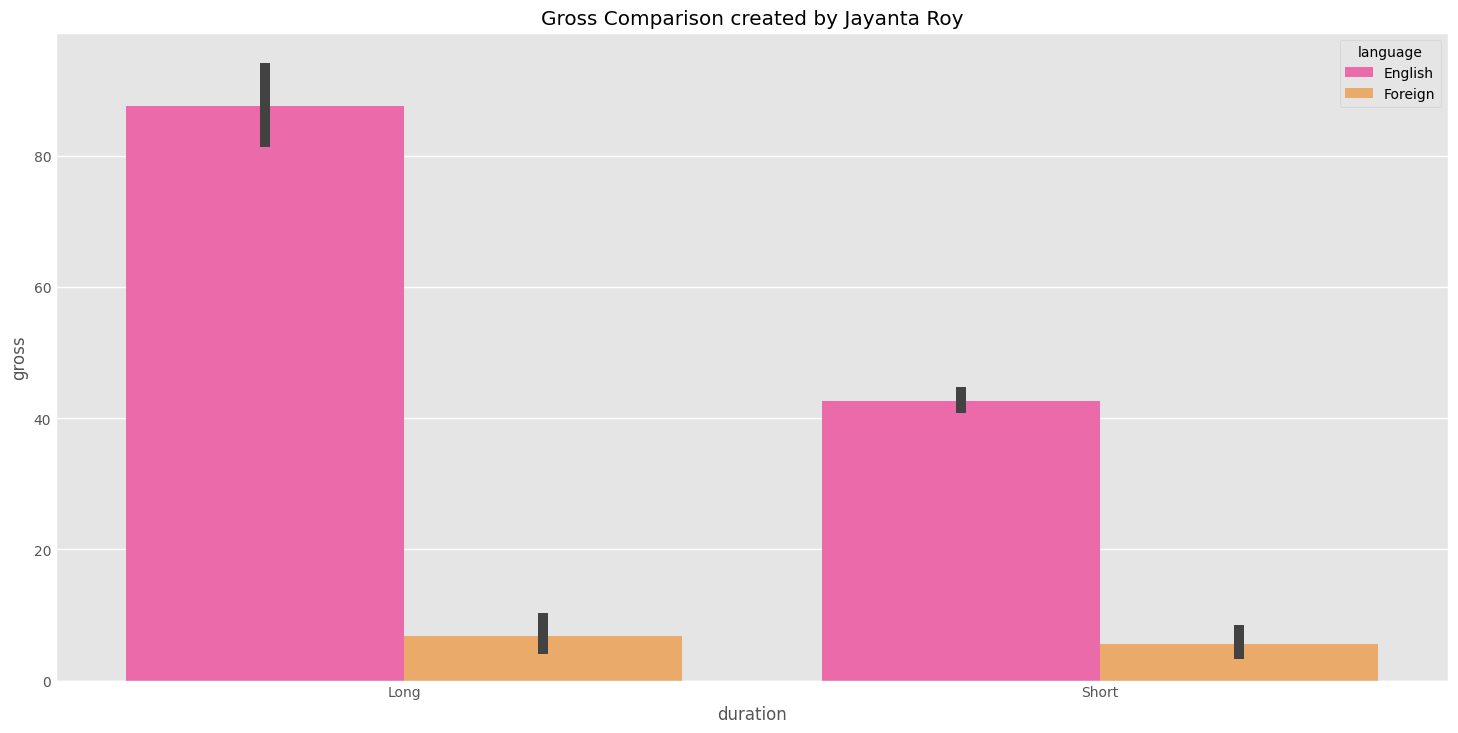

In [36]:
sns.barplot(data=data, x='duration',y='gross',hue=data['language'],palette='spring')
plt.title('Gross Comparison created by Jayanta Roy')
plt.show()

In [37]:
print("Average IMDB score for Long Duration Movies is {0:.2f}".format(data[data['duration']=='Long']['imdb_score'].mean()))
print("Average IMDB score for Short Duration Movies is {0:.2f}".format(data[data['duration']=='Short']['imdb_score'].mean()))                                                                           

Average IMDB score for Long Duration Movies is 7.06
Average IMDB score for Short Duration Movies is 6.28


In [38]:
print("\n Highest Rated for Long Duration Movies",
       data[data['duration']=='Long'][['movie_title','imdb_score']].sort_values(by='imdb_score',ascending =False).head(5))

print("\n Highest Rated for Short Duration Movies",
       data[data['duration']=='Short'][['movie_title','imdb_score']].sort_values(by='imdb_score',ascending =False).head(5))



 Highest Rated for Long Duration Movies                     movie_title  imdb_score
1937  The Shawshank Redemption          9.3
3466             The Godfather          9.2
66             The Dark Knight          9.0
2837    The Godfather: Part II          9.0
3355              Pulp Fiction          8.9

 Highest Rated for Short Duration Movies                    movie_title  imdb_score
3592       The Usual Suspects          8.6
3175       American History X          8.6
4427             Modern Times          8.6
4921       Children of Heaven          8.5
2152  Raiders of the Lost Ark          8.5


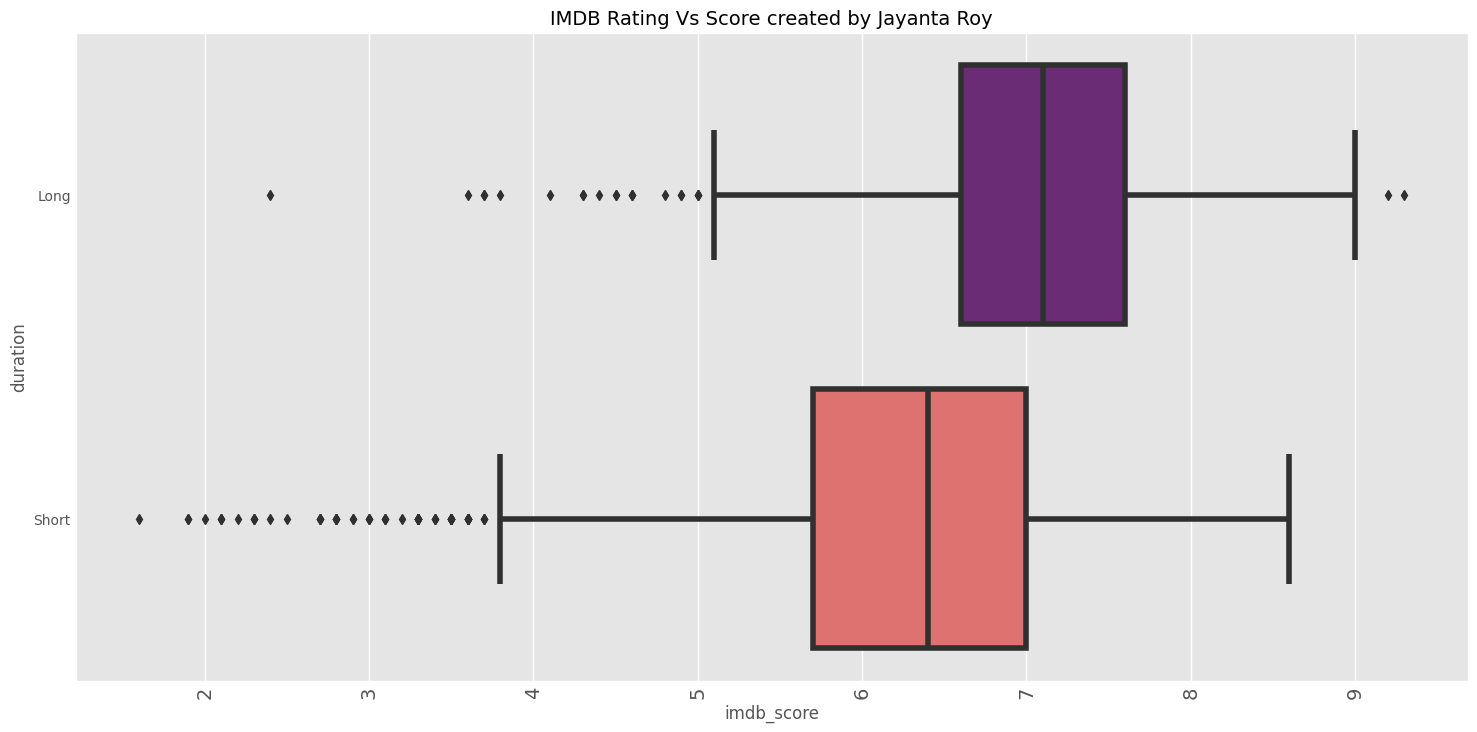

In [39]:
sns.boxplot(data=data,x='imdb_score',y='duration',palette= 'magma')
plt.title('IMDB Rating Vs Score created by Jayanta Roy', fontsize= 14)
plt.xticks(rotation=90, fontsize=14)
plt.show()

In [40]:
def query_actors(x):
    a=data[data['actor_1_name']== x]
    b=data[data['actor_2_name']== x]
    c=data[data['actor_3_name']== x]
    x=a.append(b)
    y=x.append(c)
    
    y=y [['movie_title',
     'budget',
     'gross',
     'title_year',
     'genres',
     'language',
     'imdb_score',
       ]]
    return y
    

In [41]:
query_actors('Tom Cruise')

,movie_title,budget,gross,title_year,genres,language,imdb_score
75,Edge of Tomorrow,178.0,100.189501,2014,Action|Adventure|Sci-Fi,English,7.9
135,Mission: Impossible - Rogue Nation,150.0,195.000874,2015,Action|Adventure|Thriller,English,7.4
155,Mission: Impossible - Ghost Protocol,145.0,209.364921,2011,Action|Adventure|Thriller,English,7.4
158,The Last Samurai,140.0,111.110575,2003,Action|Drama|History|War,English,7.7
189,War of the Worlds,132.0,234.277056,2005,Adventure|Sci-Fi|Thriller,English,6.5
220,Mission: Impossible II,125.0,215.397307,2000,Action|Adventure|Thriller,English,6.1
234,Knight and Day,117.0,76.418654,2010,Action|Comedy|Romance,English,6.3
284,Minority Report,102.0,132.014112,2002,Action|Mystery|Sci-Fi|Thriller,English,7.7
370,Valkyrie,75.0,83.077470,2008,Drama|History|Thriller|War,English,7.1
438,Mission: Impossible,80.0,180.965237,1996,Action|Adventure|Thriller,English,7.1


In [42]:
def actors_report(x):
    a=data[data['actor_1_name']== x]
    b=data[data['actor_2_name']== x]
    c=data[data['actor_3_name']== x]
    x=a.append(b)
    y=x.append(c)
    print('Time:',y['title_year'].min(),y['title_year'].max())
    print("Max Gross':{0:.2f} Millions".format(y['gross'].max()))
    print("Avg Gross':{0:.2f} Millions".format(y['gross'].mean()))
    print("Min Gross':{0:.2f} Millions".format(y['gross'].min()))   
    print("Number of 100 Million Movies:",y[y['gross']>100].shape[0])
    print("Avg IMDB Score: {0:.2f}".format(y['imdb_score'].mean()))
    print("Most Common Genres:\n", y['Genre1'].value_counts().head())
    
actors_report('Tom Cruise')
    

Time: 1983 2015
Max Gross':234.28 Millions
Avg Gross':118.94 Millions
Min Gross':15.00 Millions
Number of 100 Million Movies: 17
Avg IMDB Score: 7.09
Most Common Genres:
 Action       14
Drama         8
Crime         2
Adventure     1
Fantasy       1
Name: Genre1, dtype: int64


In [43]:
#Let compare Brad Pitt , Leonardo DiCaprio and Tom Cruise
def critically_acclaimed_actors(m):
    a=data[data['actor_1_name']== m]
    b=data[data['actor_2_name']== m]
    c=data[data['actor_3_name']== m]
    x=a.append(b)
    y=x.append(c)
    return y['num_critic_for_reviews'].sum().astype('int')

print('Number of Critics_for_Reviews for Brad Pitt')
display(critically_acclaimed_actors('Brad Pitt'))

print('Number of Critics_for_Reviews for Leonardo DiCaprio')
display(critically_acclaimed_actors('Leonardo DiCaprio'))

print('Number of Critics_for_Reviews for Tom Cruise')
display(critically_acclaimed_actors('Tom Cruise'))
    
    


Number of Critics_for_Reviews for Brad Pitt


7814

Number of Critics_for_Reviews for Leonardo DiCaprio


7014

Number of Critics_for_Reviews for Tom Cruise


6740

In [69]:
pd.set_option('display.max_rows',3000)

@interact
def show_movies_more_than(column='imdb_score',score=9.0):
    x=data.loc[data[column]> score][['title_year','movie_title',
                                     'director_name',
                                     'actor_1_name',
                                     'actor_2_name',
                                     'actor_3_name',
                                     'Profit',
                                     'imdb_score',
                                  ]]
    x=x.sort_values(by='imdb_score',ascending =False)
    x=x.drop_duplicates(keep='first')
    return x

interactive(children=(Text(value='imdb_score', description='column'), FloatSlider(value=9.0, description='scor…

In [70]:
pd.set_option('display.max_rows',30000)

@interact
def show_articles_more_than(column=['budget','gross'],x=1000):
    return data.loc[data[column]> x][['movie_title','duration','gross','Profit','imdb_score']]

interactive(children=(Dropdown(description='column', options=('budget', 'gross'), value='budget'), IntSlider(v…

## Recommending Movies based on Languages

In [46]:
def recommend_lang(x):
    y=data[['movie_title','language','imdb_score']][data['language']==x]
    y=y.sort_values(by='imdb_score',ascending =False)   
    return y.head(15)
                                                  

In [47]:
recommend_lang('Foreign')

,movie_title,language,imdb_score
4498,"The Good, the Bad and the Ugly",Foreign,8.9
4029,City of God,Foreign,8.7
4747,Seven Samurai,Foreign,8.7
2373,Spirited Away,Foreign,8.6
4921,Children of Heaven,Foreign,8.5
4259,The Lives of Others,Foreign,8.5
3931,Samsara,Foreign,8.5
4659,A Separation,Foreign,8.4
1329,Baahubali: The Beginning,Foreign,8.4
2970,Das Boot,Foreign,8.4


## Recommending Movies Based on Actors

In [48]:
def recommend_movies_on_actors(x):
    a=data[['movie_title','imdb_score',]][data['actor_1_name']==x]
    b=data[['movie_title','imdb_score',]][data['actor_2_name']==x]
    c=data[['movie_title','imdb_score',]][data['actor_3_name']==x]
    a=a.append(b)
    a=a.append(c)
    a=a.sort_values(by= 'imdb_score',ascending =False)
    return a.head(15)

In [84]:
recommend_movies_on_actors('Tom Cruise')

,movie_title,imdb_score
1868,Rain Man,8.0
75,Edge of Tomorrow,7.9
284,Minority Report,7.7
158,The Last Samurai,7.7
736,Collateral,7.6
1524,A Few Good Men,7.6
940,Interview with the Vampire: The Vampire Chroni...,7.6
155,Mission: Impossible - Ghost Protocol,7.4
135,Mission: Impossible - Rogue Nation,7.4
671,Eyes Wide Shut,7.3


## Recommending similar Genres

In [50]:
from mlxtend.preprocessing import TransactionEncoder

x=data['genres'].str.split('|')
te=TransactionEncoder()
x=te.fit_transform(x)
x=pd.DataFrame(x,columns=te.columns_)

#Lets check the head of x
x.head()


,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,Music,Musical,Mystery,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,True,True,False,False,False,False,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
1,True,True,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False


In [51]:
# Lets convert this data into boolean so that we can perform calculations
genres=x.astype('int')

genres.head()

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,Music,Musical,Mystery,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [52]:
# Now lets  insert the movie title in first column, so we can better understand the data 
genres.insert(0,'movie_title',data['movie_title'])

genres.head()

,movie_title,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,...,Music,Musical,Mystery,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,Avatar,1,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,Pirates of the Caribbean: At World's End,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Spectre,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,The Dark Knight Rises,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,NaN,1,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [53]:
# Let set these movie title as index of the data 
genres=genres.set_index('movie_title')

genres.head()

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,Music,Musical,Mystery,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
movie_title,,,,,,,,,,,,,,,,,,,,,
Avatar,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
Pirates of the Caribbean: At World's End,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
Spectre,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
The Dark Knight Rises,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
NaN,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [71]:
# So making a recommendation engine for getting similar genres
def recommendation_genres(gen):
    gen=genres[gen]
    similar_genres=genres.corrwith(gen)
    similar_genres=similar_genres.sort_values(ascending =False)
    similar_genres=similar_genres.iloc[1:]
    return similar_genres.head(3)

In [72]:
recommendation_genres('Action')

Adventure    0.320686
Thriller     0.303907
Sci-Fi       0.295135
dtype: float64

## Recommending similar Movies

In [73]:
x=genres.transpose()
x.head()

movie_title,Avatar,Pirates of the Caribbean: At World's End,Spectre,The Dark Knight Rises,NaN,John Carter,Spider-Man 3,Tangled,Avengers: Age of Ultron,Harry Potter and the Half-Blood Prince,...,25th Hour,NaN,Bound,Requiem for a Dream,NaN,Tango,NaN,Moms' Night Out,Donnie Darko,NaN
Action,1,1,1,1,1,1,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0
Adventure,1,1,1,0,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
Animation,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Biography,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Comedy,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0


In [74]:
# Making a recommendation engine for getting simlar movies 
def recommendation_movie(movie):
    movie=x[movie+'\xa0']
    similar_movies=x.corrwith(movie)
    similar_movies=similar_movies.sort_values(ascending =False)
    similar_movies=similar_movies.iloc[1:]
    return similar_movies.head(20)

In [75]:
# Lets test on some result
recommendation_movie('The Expendables')

movie_title
The Good German                                                1.0
NaN                                                            1.0
Million Dollar Arm                                             1.0
Down to Earth                                                  1.0
L'auberge espagnole                                            1.0
NaN                                                            1.0
The Assassination of Jesse James by the Coward Robert Ford     1.0
Scary Movie 2                                                  1.0
Stir of Echoes                                                 1.0
Arthur and the Invisibles                                      1.0
Edmond                                                         1.0
Miss Potter                                                    1.0
40 Days and 40 Nights                                          1.0
The Client                                                     1.0
NaN                                               